<a href="https://colab.research.google.com/github/evaaaaho1999/Special-Topics-on-Financial-Engineering/blob/main/Financial%20Engineering%20Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# inline plotting instead of popping out
%matplotlib inline
import re
import os
import numpy as np # numpy  1.17.1
import pandas as pd # pandas  0.25.1
import matplotlib.pyplot as plt # matplotlib 3.1.1
import seaborn as sns # seaborn 0.9.0
from sklearn.preprocessing import StandardScaler # scikit-learn 0.21.3
import scipy.stats



# inline plotting instead of popping out
%matplotlib inline

# python 3.7.3
import os, itertools, csv

from IPython.display import Image
from IPython.display import display

# numpy  1.17.1
import numpy as np

# pandas  0.25.1
import pandas as pd

# scikit-learn  0.21.3
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_moons
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC

# matplotlib  3.1.1
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt = matplotlib.pyplot


# Mount Google account & Read data

In [ ]:
# #Mount google drive to google colab virtual machine
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

In [ ]:
#Mount google drive to google colab virtual machine
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/"

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/fintech/X_train.csv')

In [ ]:
df2=pd.DataFrame()
df2['state']=df['addr_state']
df2['grade']=df['grade']
df2['delinq']=df['acc_now_delinq']
df2['loan']=df['loan_amnt']
df2['fico_low']=df['fico_range_low']
df2['remain']=df['out_prncp']
df2['inc']=df['annual_inc']
df2['trades']=df['total_cu_tl']
df2

,state,grade,delinq,loan,fico_low,remain,inc,trades
0,FL,A,0.0,3000.0,725.0,0.00,58000.0,NaN
1,TX,A,0.0,24000.0,745.0,16690.99,80000.0,6.0
2,IN,B,0.0,10000.0,720.0,7002.98,45000.0,0.0
3,PA,A,0.0,5000.0,780.0,0.00,76000.0,2.0
4,NY,C,0.0,12000.0,665.0,0.00,72000.0,0.0
...,...,...,...,...,...,...,...,...
2132795,NV,C,0.0,9600.0,690.0,0.00,50000.0,NaN
2132796,MS,D,0.0,17000.0,700.0,6278.49,60000.0,3.0
2132797,IL,D,0.0,5000.0,715.0,4568.48,60000.0,0.0
2132798,NJ,A,0.0,6000.0,695.0,0.00,90000.0,0.0


In [ ]:
df2=df2.drop([  14768,   29994,  133637,  186159,  191746,  202357,  293306,
         496195,  516748,  556488,  625375,  722918,  794659,  841300,
         892182, 1020638, 1028064, 1073257, 1086561, 1086829, 1093870,
        1124750, 1200096, 1209044, 1443365, 1453664, 1595898, 1603651,
        1679767, 1729525, 1730006, 1932561, 2049516],axis=0)


In [ ]:
df2.to_csv('/content/drive/My Drive/fintech1111/X_train_new.csv', index=0)

In [ ]:
df2=pd.read_csv('/content/drive/My Drive/fintech1111/X_train_new.csv')

# EDA

## 各州資料分布

In [ ]:
print("# of NaN in each columns:", df2.isnull().sum(), sep='\n')

# of NaN in each columns:
state            0
grade            0
delinq           0
loan             0
fico_low         0
remain           0
inc              0
trades      508185
dtype: int64


In [ ]:
df2.columns

Index(['state', 'grade', 'delinq', 'loan', 'fico_low', 'remain', 'inc'], dtype='object')

In [ ]:
df2=df2.fillna(0)

In [ ]:
st_inc = list(zip(df2['state'],df2['inc']))
st_inc

[('FL', 58000.0),
 ('TX', 80000.0),
 ('IN', 45000.0),
 ('PA', 76000.0),
 ('NY', 72000.0),
 ('KS', 52000.0),
 ('KY', 85000.0),
 ('MN', 45000.0),
 ('NJ', 53660.0),
 ('CA', 65000.0),
 ('VA', 29016.0),
 ('TX', 120000.0),
 ('TX', 75000.0),
 ('MA', 60000.0),
 ('CA', 50000.0),
 ('FL', 38480.0),
 ('IL', 26000.0),
 ('WA', 90000.0),
 ('NJ', 80000.0),
 ('TN', 60000.0),
 ('MA', 75000.0),
 ('FL', 60000.0),
 ('GA', 55000.0),
 ('TN', 32250.0),
 ('FL', 155000.0),
 ('OR', 30000.0),
 ('TX', 56000.0),
 ('IL', 99000.0),
 ('CA', 85000.0),
 ('TX', 95000.0),
 ('GA', 80000.0),
 ('FL', 40000.0),
 ('TX', 216000.0),
 ('OH', 68750.0),
 ('MO', 35000.0),
 ('NY', 93000.0),
 ('NC', 112000.0),
 ('IL', 40000.0),
 ('NY', 40000.0),
 ('CA', 70100.0),
 ('CA', 58000.0),
 ('CA', 92000.0),
 ('TN', 70000.0),
 ('NY', 110000.0),
 ('MD', 175000.0),
 ('MI', 60000.0),
 ('NY', 75000.0),
 ('FL', 90000.0),
 ('CO', 26000.0),
 ('IL', 125000.0),
 ('CA', 158000.0),
 ('WA', 60000.0),
 ('NV', 60000.0),
 ('OH', 100000.0),
 ('CA', 34000.0),
 

In [ ]:
item_dict7 = {}

In [ ]:
def state_inc(row):
  key,value = row["state"], row["inc"]
  if key in item_dict7:
    tmp_sum,tmp_count = item_dict7[key]
    item_dict7[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict7[key] = (value, 1)

In [ ]:
df2.apply(state_inc, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
a=[(key,item_dict7[key][1]) for key in item_dict7]
b=[x[0] for x in a]
c=[x[1] for x in a]
b

['FL',
 'TX',
 'IN',
 'PA',
 'NY',
 'KS',
 'KY',
 'MN',
 'NJ',
 'CA',
 'VA',
 'MA',
 'IL',
 'WA',
 'TN',
 'GA',
 'OR',
 'OH',
 'MO',
 'NC',
 'MD',
 'MI',
 'CO',
 'NV',
 'AZ',
 'UT',
 'CT',
 'AR',
 'AL',
 'SC',
 'WI',
 'NE',
 'LA',
 'NM',
 'MS',
 'RI',
 'OK',
 'ID',
 'SD',
 'WV',
 'ME',
 'VT',
 'AK',
 'HI',
 'DC',
 'ND',
 'DE',
 'WY',
 'NH',
 'MT',
 'IA']

In [ ]:
import plotly.graph_objects as go 
import pandas as pd 

fig = go.Figure(data=go.Choropleth( 
    locations=b, # 設定位置，各州的編號（縮寫） 
    z =c, # 設定填充色資料 
    locationmode = 'USA-states', # 設定國家名稱 
    colorscale = 'Burg', # 圖例顏色 
    colorbar_title = "資料數量", # 圖例標題 
)) 
 
fig.update_layout( 
    title_text = '美國各州資料分布', # 地圖示題 
    geo_scope='usa', # 設定地圖的範圍為美國 
    #scope可選有"world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
) 
# fig.write_html('/content/drive/My Drive/fintech1111/data.html')

## 各州借款金額




In [ ]:
df2.columns

Index(['state', 'grade', 'delinq', 'loan', 'fico_low', 'remain', 'inc',
       'trades'],
      dtype='object')

In [ ]:
st_lo = list(zip(df2['state'],df2['loan']))
st_lo

[('FL', 3000.0),
 ('TX', 24000.0),
 ('IN', 10000.0),
 ('PA', 5000.0),
 ('NY', 12000.0),
 ('KS', 15000.0),
 ('KY', 20000.0),
 ('MN', 2500.0),
 ('NJ', 19300.0),
 ('CA', 18000.0),
 ('VA', 5000.0),
 ('TX', 12000.0),
 ('TX', 1500.0),
 ('MA', 8000.0),
 ('CA', 9000.0),
 ('FL', 13000.0),
 ('IL', 8950.0),
 ('WA', 31900.0),
 ('NJ', 30000.0),
 ('TN', 5000.0),
 ('MA', 25525.0),
 ('FL', 9000.0),
 ('GA', 6400.0),
 ('TN', 16000.0),
 ('FL', 30000.0),
 ('OR', 10000.0),
 ('TX', 14400.0),
 ('IL', 24000.0),
 ('CA', 25000.0),
 ('TX', 18000.0),
 ('GA', 15000.0),
 ('FL', 28000.0),
 ('TX', 33000.0),
 ('OH', 22550.0),
 ('MO', 5000.0),
 ('NY', 9000.0),
 ('NC', 20000.0),
 ('IL', 15000.0),
 ('NY', 30000.0),
 ('CA', 12000.0),
 ('CA', 13000.0),
 ('CA', 15000.0),
 ('TN', 8400.0),
 ('NY', 12000.0),
 ('MD', 10525.0),
 ('MI', 14000.0),
 ('NY', 27000.0),
 ('FL', 4500.0),
 ('CO', 10000.0),
 ('IL', 10450.0),
 ('CA', 40000.0),
 ('WA', 12000.0),
 ('NV', 26000.0),
 ('OH', 26000.0),
 ('CA', 10000.0),
 ('FL', 15000.0),
 ('MA',

In [ ]:
item_dict = {}

In [ ]:
def count_sum(row):
  key,value = row["state"], row["loan"]
  if key in item_dict:
    tmp_sum,tmp_count = item_dict[key]
    item_dict[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict[key] = (value, 1)

In [ ]:
df2.apply(count_sum, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
state_loan_avg = [(key,item_dict[key][0] / item_dict[key][1])  for key in item_dict]
state_loan_avg

[('FL', 14959.14945220373),
 ('TX', 16154.361351081829),
 ('IN', 14974.02937803746),
 ('PA', 15141.484064444538),
 ('NY', 15303.575448480184),
 ('KS', 15308.827988993093),
 ('KY', 14655.841503267973),
 ('MN', 15055.942617385874),
 ('NJ', 16304.283078034869),
 ('CA', 15874.08155489119),
 ('VA', 16664.90712418189),
 ('MA', 16054.428913983564),
 ('IL', 15913.133748420018),
 ('WA', 15866.24506151936),
 ('TN', 15019.240248151611),
 ('GA', 15774.864034468144),
 ('OR', 14696.573474592898),
 ('OH', 14731.13346695084),
 ('MO', 14973.938433547553),
 ('NC', 15300.196128159609),
 ('MD', 16357.672820109976),
 ('MI', 14640.86470026487),
 ('CO', 15562.390959998214),
 ('NV', 14895.98355624475),
 ('AZ', 14969.464793671823),
 ('UT', 15672.150689777149),
 ('CT', 15765.812746889924),
 ('AR', 14424.018731899685),
 ('AL', 15076.884496676163),
 ('SC', 15417.249085737505),
 ('WI', 14948.796483391825),
 ('NE', 14570.19548615069),
 ('LA', 15246.612597429956),
 ('NM', 15338.18712932637),
 ('MS', 15000.7399018497

In [ ]:
list3 = [x[0] for x in state_loan_avg]
lo = [x[1] for x in state_loan_avg]
# list3
# lo

In [ ]:
import plotly.graph_objects as go 
import pandas as pd 

fig = go.Figure(data=go.Choropleth( 
    locations=list3, # 設定位置，各州的編號（縮寫） 
    z =lo, # 設定填充色資料 
    locationmode = 'USA-states', # 設定國家名稱 
    colorscale = 'Inferno', # 圖例顏色 
    colorbar_title = "金額", # 圖例標題 
)) 
 
fig.update_layout( 
    yaxis_range=[14000,16000],
    title_text = '美國各州借款金額', # 地圖示題 
    geo_scope='usa', # 設定地圖的範圍為美國 
    #scope可選有"world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
) 
# fig.write_html('/content/drive/My Drive/fintech1111/state_loan.html')

## 各州信用等級


In [ ]:
st_gr = list(zip(df2['state'],df2['grade']))
st_gr

In [ ]:
item_dict2 = {}

In [ ]:
def count_grade(row):
  key,value = row["state"], row["grade"]
  if value == "A":
    value = 10
  elif value == "B":
    value = 8
  elif value == "C":
    value = 6
  elif value == "D":
    value = 4
  elif value == "E":
    value = 2
  elif value == "F":
    value = 1
  else:
    value = 0
  if key in item_dict2:
    tmp_sum,tmp_count = item_dict2[key]
    item_dict2[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict2[key] = (value, 1)

In [ ]:
df2.apply(count_grade, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
state_grade_avg = [(key,item_dict2[key][0] / item_dict2[key][1])  for key in item_dict2]
state_grade_avg

[('FL', 6.883962403741613),
 ('TX', 6.9602731744484405),
 ('IN', 6.87295910009283),
 ('PA', 6.871785147416179),
 ('NY', 6.913324935264889),
 ('KS', 6.955635424271354),
 ('KY', 6.849288735101884),
 ('MN', 6.943106210792168),
 ('NJ', 6.960834161386484),
 ('CA', 6.977903524470605),
 ('VA', 6.931782839761445),
 ('MA', 7.123542311397126),
 ('IL', 6.982737231403024),
 ('WA', 6.904616773902246),
 ('TN', 6.838333191694287),
 ('GA', 6.837844328294957),
 ('OR', 6.98583480478713),
 ('OH', 6.875552230800717),
 ('MO', 6.934471931214603),
 ('NC', 6.870504691858991),
 ('MD', 6.841967792615868),
 ('MI', 6.865817402115353),
 ('CO', 7.138210293822368),
 ('NV', 6.863442527621632),
 ('AZ', 6.9852706230760235),
 ('UT', 6.892324018394057),
 ('CT', 6.933523966747243),
 ('AR', 6.774970731406741),
 ('AL', 6.676717315606204),
 ('SC', 6.839939418565993),
 ('WI', 7.028076145910879),
 ('NE', 6.904251681294882),
 ('LA', 6.84929429113124),
 ('NM', 6.908559794635744),
 ('MS', 6.682295205738014),
 ('RI', 6.93602341626

In [ ]:
st = [x[0] for x in state_grade_avg]
gr = [x[1] for x in state_grade_avg]
gr

[6.883962403741613,
 6.9602731744484405,
 6.87295910009283,
 6.871785147416179,
 6.913324935264889,
 6.955635424271354,
 6.849288735101884,
 6.943106210792168,
 6.960834161386484,
 6.977903524470605,
 6.931782839761445,
 7.123542311397126,
 6.982737231403024,
 6.904616773902246,
 6.838333191694287,
 6.837844328294957,
 6.98583480478713,
 6.875552230800717,
 6.934471931214603,
 6.870504691858991,
 6.841967792615868,
 6.865817402115353,
 7.138210293822368,
 6.863442527621632,
 6.9852706230760235,
 6.892324018394057,
 6.933523966747243,
 6.774970731406741,
 6.676717315606204,
 6.839939418565993,
 7.028076145910879,
 6.904251681294882,
 6.84929429113124,
 6.908559794635744,
 6.682295205738014,
 6.936023416265942,
 6.8246139780577,
 6.99214512810922,
 6.83232134516581,
 6.932768361581921,
 7.0945709281961475,
 6.94827229464101,
 6.803199326457588,
 6.582739018087855,
 7.151217428449381,
 6.8715055142344195,
 6.8875404530744335,
 6.877240753346948,
 7.096575534198003,
 7.019091062679506,
 6.

In [ ]:
import plotly.graph_objects as go 
import pandas as pd 

fig = go.Figure(data=go.Choropleth( 
    locations=st, # 設定位置，各州的編號（縮寫） 
    z =gr, # 設定填充色資料 
    locationmode = 'USA-states', # 設定國家名稱 
    colorscale = 'Orrd', # 圖例顏色 
    colorbar_title = "金額", # 圖例標題 
)) 
 
fig.update_layout( 
    yaxis_range=[6.5,7.5],
    title_text = '美國各州信用等級', # 地圖示題 
    geo_scope='usa', # 設定地圖的範圍為美國 
    #scope可選有"world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
) 
# fig.write_html('/content/drive/My Drive/fintech1111/state_grade.html')

## 信用等級 vs 信用分數所屬下限

In [ ]:
df2.columns

Index(['state', 'grade', 'delinq', 'loan', 'fico_low', 'remain', 'inc',
       'trades'],
      dtype='object')

In [ ]:
gr_fi = list(zip(df2['grade'],df2['fico_low']))
gr_fi

In [ ]:
item_dict3 = {}

In [ ]:
def grade_fico(row):
  key,value = row["grade"], row["fico_low"]
  if key in item_dict3:
    tmp_sum,tmp_count = item_dict3[key]
    item_dict3[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict3[key] = (value, 1)

In [ ]:
df2.apply(grade_fico, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
grade_fico_avg = [(key,item_dict3[key][0] / item_dict3[key][1])  for key in item_dict3]
grade_fico_avg=sorted(grade_fico_avg)
grade_fico_avg

[('A', 726.5610226824663),
 ('B', 701.7354848814135),
 ('C', 690.0137642930382),
 ('D', 684.7344320546547),
 ('E', 682.8128200188589),
 ('F', 681.0925832854681),
 ('G', 680.2094458288833)]

In [ ]:
gr2 = [x[0] for x in grade_fico_avg]
fi = [x[1] for x in grade_fico_avg]
gr2

['A', 'B', 'C', 'D', 'E', 'F', 'G']

<BarContainer object of 7 artists>

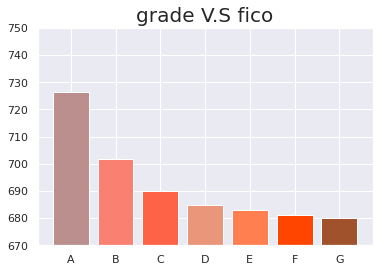

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np 
# def update_ticks(x,pos):
#     if x == 0:
#         return 'False'
#     if x==1:
#         return 'True'
sns.set(style = "darkgrid")
plt.title("grade V.S fico", fontdict = {'fontsize': 20})
plt.ylim(670, 750)
plt.bar(gr2, fi, width=0.8, bottom=None, align='center', color=['rosybrown', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'sienna' ])
# ax = sns.countplot(x = gr2, hue = fi, palette=["mediumorchid","indigo"] )
# ['aqua', 'darkcyan', 'steelblue', 'cornflowerblue', 'slateblue', 'orchid', 'plum' ]   
# ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
# ax.legend(["not repeated", "repeated"], loc=1) 

## 信用等級 vs 借款金額 

In [ ]:
gr_lo = list(zip(df2['grade'],df2['loan']))
gr_lo

In [ ]:
item_dict4 = {}

In [ ]:
def grade_loan(row):
  key,value = row["grade"], row["loan"]
  if key in item_dict4:
    tmp_sum,tmp_count = item_dict4[key]
    item_dict4[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict4[key] = (value, 1)

In [ ]:
df2.apply(grade_loan, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
grade_loan_avg = [(key,item_dict4[key][0] / item_dict4[key][1])  for key in item_dict4]
grade_loan_avg=sorted(grade_loan_avg)
grade_loan_avg

[('A', 15423.51023097516),
 ('B', 15073.788583598267),
 ('C', 15334.535981740104),
 ('D', 15850.935041946419),
 ('E', 17312.731807719996),
 ('F', 18936.2255887421),
 ('G', 20192.055298445473)]

In [ ]:
gr3 = [x[0] for x in grade_loan_avg]
lo2 = [x[1] for x in grade_loan_avg]
gr3

['A', 'B', 'C', 'D', 'E', 'F', 'G']

<BarContainer object of 7 artists>

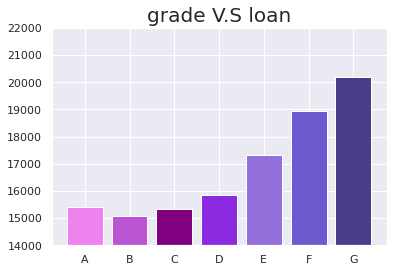

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np 
# def update_ticks(x,pos):
#     if x == 0:
#         return 'False'
#     if x==1:
#         return 'True'
sns.set(style = "darkgrid")
plt.title("grade V.S loan", fontdict = {'fontsize': 20})
plt.ylim(14000, 22000)
plt.bar(gr3, lo2, width=0.8, bottom=None, align='center', color=[ 'violet', 'mediumorchid','purple', 'blueviolet', 'mediumpurple',"slateblue","darkslateblue" ]  )
# ax = sns.countplot(x = gr2, hue = fi, palette=['aqua', 'darkcyan'] )
# ['aqua', 'darkcyan', 'steelblue', 'cornflowerblue', 'slateblue',"mediumorchid","indigo" ]   
# ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
# ax.legend(["not repeated", "repeated"], loc=1) 

## 各州未償還本金

In [ ]:
st_re = list(zip(df2['state'],df2['remain']))
st_re

In [ ]:
item_dict5 = {}

In [ ]:
def state_remain(row):
  key,value = row["state"], row["remain"]
  if key in item_dict5:
    tmp_sum,tmp_count = item_dict5[key]
    item_dict5[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict5[key] = (value, 1)

In [ ]:
df2.apply(state_remain, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
state_remain_avg = [(key,item_dict5[key][0]/item_dict5[key][1])  for key in item_dict5]
state_remain_avg

[('FL', 3657.555683185285),
 ('TX', 3811.8327282149294),
 ('IN', 3543.5945527767117),
 ('PA', 3524.2582912645858),
 ('NY', 3479.101864196185),
 ('KS', 3676.165752793847),
 ('KY', 3563.6191469627092),
 ('MN', 3384.2579906580077),
 ('NJ', 3903.9870356557703),
 ('CA', 3611.7466473563654),
 ('VA', 3978.5962104615446),
 ('MA', 3759.8278679318832),
 ('IL', 3822.148214854153),
 ('WA', 3668.4171014787335),
 ('TN', 3632.6316872043208),
 ('GA', 3830.737506427448),
 ('OR', 3595.3748369629157),
 ('OH', 3556.907068977693),
 ('MO', 3603.175467323995),
 ('NC', 3599.869734888842),
 ('MD', 3946.9779283189278),
 ('MI', 3320.938929710438),
 ('CO', 3435.844790397801),
 ('NV', 3307.7643122052145),
 ('AZ', 3466.8151572302836),
 ('UT', 3316.1216087725597),
 ('CT', 4016.545328105659),
 ('AR', 3550.9118349867467),
 ('AL', 3472.4954487179325),
 ('SC', 3974.25674153153),
 ('WI', 3479.773729306253),
 ('NE', 4139.806436794726),
 ('LA', 3588.569909416478),
 ('NM', 3684.784990705488),
 ('MS', 3678.481353718383),
 ('

In [ ]:
st2 = [x[0] for x in state_remain_avg]
re = [x[1] for x in state_remain_avg]
re

[3657.555683185285,
 3811.8327282149294,
 3543.5945527767117,
 3524.2582912645858,
 3479.101864196185,
 3676.165752793847,
 3563.6191469627092,
 3384.2579906580077,
 3903.9870356557703,
 3611.7466473563654,
 3978.5962104615446,
 3759.8278679318832,
 3822.148214854153,
 3668.4171014787335,
 3632.6316872043208,
 3830.737506427448,
 3595.3748369629157,
 3556.907068977693,
 3603.175467323995,
 3599.869734888842,
 3946.9779283189278,
 3320.938929710438,
 3435.844790397801,
 3307.7643122052145,
 3466.8151572302836,
 3316.1216087725597,
 4016.545328105659,
 3550.9118349867467,
 3472.4954487179325,
 3974.25674153153,
 3479.773729306253,
 4139.806436794726,
 3588.569909416478,
 3684.784990705488,
 3678.481353718383,
 3622.866513694334,
 3734.94710686714,
 4780.954415560125,
 3711.4501517982226,
 5129.043383050852,
 4575.427921190893,
 3636.2290647630803,
 3906.185064197024,
 3752.363918346259,
 3625.3362516018806,
 4516.903616311874,
 3876.160135922329,
 3732.351862945316,
 3653.4713445927064,


In [ ]:
import plotly.graph_objects as go 
import pandas as pd 

fig = go.Figure(data=go.Choropleth( 
    locations=st2, # 設定位置，各州的編號（縮寫） 
    z =re, # 設定填充色資料 
    locationmode = 'USA-states', # 設定國家名稱 
    colorscale = 'Jet', # 圖例顏色 
    colorbar_title = "金額", # 圖例標題 
)) 
 
fig.update_layout( 
    title_text = '美國各州未償還本金', # 地圖示題 
    geo_scope='usa', # 設定地圖的範圍為美國 
    #scope可選有"world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
) 
# fig.write_html('/content/drive/My Drive/fintech1111/state_remain.html')

## 信用等級 v.s.未償還本金

In [ ]:
df2.columns

Index(['state', 'grade', 'delinq', 'loan', 'fico_low', 'remain'], dtype='object')

In [ ]:
 list(zip(df2['grade'],df2['remain']))

In [ ]:
item_dict6 = {}

In [ ]:
def grade_remain(row):
  key,value = row["grade"], row["remain"]
  if key in item_dict6:
    tmp_sum,tmp_count = item_dict6[key]
    item_dict6[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict6[key] = (value, 1)

In [ ]:
df2.apply(grade_remain, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
grade_remain_avg = [(key,item_dict6[key][0] / item_dict6[key][1])  for key in item_dict6]
grade_remain_avg=sorted(grade_remain_avg)
grade_remain_avg

[('A', 4449.727936704934),
 ('B', 3894.335034851782),
 ('C', 3381.5667114253793),
 ('D', 3608.8667088421157),
 ('E', 1242.300183925297),
 ('F', 1033.247696726022),
 ('G', 1111.0681381274478)]

In [ ]:
gr4 = [x[0] for x in grade_remain_avg]
re2 = [x[1] for x in grade_remain_avg]
re2
gr4

['A', 'B', 'C', 'D', 'E', 'F', 'G']

<BarContainer object of 7 artists>

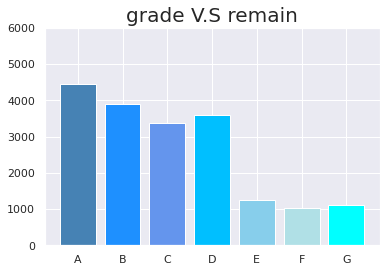

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np 
# def update_ticks(x,pos):
#     if x == 0:
#         return 'False'
#     if x==1:
#         return 'True'
sns.set(style = "darkgrid")
plt.title("grade V.S remain", fontdict = {'fontsize': 20})
plt.ylim(0, 6000)
plt.bar(gr4, re2, width=0.8, bottom=None, align='center', color=['steelblue','dodgerblue','cornflowerblue','deepskyblue','skyblue', 'powderblue','aqua'])
# ax = sns.countplot(x = gr2, hue = fi, palette=["mediumorchid","indigo"] )
# ['aqua', 'darkcyan', 'steelblue', 'cornflowerblue', 'slateblue', 'orchid', 'plum' ]   
# ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
# ax.legend(["not repeated", "repeated"], loc=1) 

##各州年所得

In [ ]:
st_inc = list(zip(df2['state'],df2['inc']))
st_inc

In [ ]:
item_dict7 = {}

In [ ]:
def state_inc(row):
  key,value = row["state"], row["inc"]
  if key in item_dict7:
    tmp_sum,tmp_count = item_dict7[key]
    item_dict7[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict7[key] = (value, 1)

In [ ]:
df2.apply(state_inc, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
state_inc_avg = [(key,item_dict7[key][0] / item_dict7[key][1])  for key in item_dict7]
state_inc_avg

[('FL', 75795.02174046762),
 ('TX', 85038.69934899769),
 ('IN', 72093.25727461363),
 ('PA', 76026.26996994088),
 ('NY', 84066.40595936254),
 ('KS', 73990.92562306955),
 ('KY', 71554.23091887735),
 ('MN', 75855.2994802162),
 ('NJ', 92471.72061310348),
 ('CA', 87251.12557501509),
 ('VA', 88203.08379329789),
 ('MA', 85017.33286905907),
 ('IL', 82250.75813210999),
 ('WA', 80389.18680437974),
 ('TN', 72559.27371349253),
 ('GA', 80714.54489730182),
 ('OR', 71409.17350833827),
 ('OH', 71429.67920041208),
 ('MO', 72301.21350177539),
 ('NC', 76478.48213881144),
 ('MD', 89968.56085388848),
 ('MI', 73559.63316654356),
 ('CO', 79627.91888874021),
 ('NV', 75624.91099017899),
 ('AZ', 76816.42131940926),
 ('UT', 77561.54590802972),
 ('CT', 89675.47950356705),
 ('AR', 69051.71963768564),
 ('AL', 73388.96302508705),
 ('SC', 75120.27837058106),
 ('WI', 70797.79651742349),
 ('NE', 67755.51653482276),
 ('LA', 77586.4704019381),
 ('NM', 73935.57368681951),
 ('MS', 72762.18424764062),
 ('RI', 76968.75961530

In [ ]:
stt = [x[0] for x in state_inc_avg]
inc = [x[1] for x in state_inc_avg]


In [ ]:
import plotly.graph_objects as go 
import pandas as pd 

fig = go.Figure(data=go.Choropleth( 
    locations=stt, # 設定位置，各州的編號（縮寫） 
    z =inc, # 設定填充色資料 
    locationmode = 'USA-states', # 設定國家名稱 
    colorscale = 'Brbg', # 圖例顏色 
    colorbar_title = "年所得", # 圖例標題 
)) 
 
fig.update_layout( 
    title_text = '美國各州年所得', # 地圖示題 
    geo_scope='usa', # 設定地圖的範圍為美國 
    #scope可選有"world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
) 
fig.write_html('/content/drive/My Drive/fintech1111/state_inc.html')

##各州金融交易數量

In [ ]:
st_trade = list(zip(df2['state'],df2['trades']))
st_trade

[('FL', 0.0),
 ('TX', 6.0),
 ('IN', 0.0),
 ('PA', 2.0),
 ('NY', 0.0),
 ('KS', 0.0),
 ('KY', 0.0),
 ('MN', 1.0),
 ('NJ', 0.0),
 ('CA', 0.0),
 ('VA', 0.0),
 ('TX', 0.0),
 ('TX', 0.0),
 ('MA', 0.0),
 ('CA', 0.0),
 ('FL', 5.0),
 ('IL', 0.0),
 ('WA', 1.0),
 ('NJ', 0.0),
 ('TN', 5.0),
 ('MA', 0.0),
 ('FL', 0.0),
 ('GA', 2.0),
 ('TN', 2.0),
 ('FL', 0.0),
 ('OR', 0.0),
 ('TX', 0.0),
 ('IL', 0.0),
 ('CA', 0.0),
 ('TX', 1.0),
 ('GA', 0.0),
 ('FL', 5.0),
 ('TX', 0.0),
 ('OH', 1.0),
 ('MO', 0.0),
 ('NY', 0.0),
 ('NC', 3.0),
 ('IL', 0.0),
 ('NY', 0.0),
 ('CA', 0.0),
 ('CA', 1.0),
 ('CA', 1.0),
 ('TN', 0.0),
 ('NY', 0.0),
 ('MD', 0.0),
 ('MI', 3.0),
 ('NY', 1.0),
 ('FL', 0.0),
 ('CO', 4.0),
 ('IL', 0.0),
 ('CA', 1.0),
 ('WA', 0.0),
 ('NV', 1.0),
 ('OH', 0.0),
 ('CA', 0.0),
 ('FL', 0.0),
 ('MA', 0.0),
 ('GA', 0.0),
 ('FL', 1.0),
 ('MA', 0.0),
 ('NV', 0.0),
 ('AZ', 1.0),
 ('OR', 5.0),
 ('CA', 0.0),
 ('NJ', 1.0),
 ('CA', 3.0),
 ('MI', 0.0),
 ('IL', 2.0),
 ('NY', 0.0),
 ('WA', 0.0),
 ('NY', 0.0),
 ('AZ'

In [ ]:
item_dict8 = {}

In [ ]:
def state_trade(row):
  key,value = row["state"], row["trades"]
  if key in item_dict8:
    tmp_sum,tmp_count = item_dict8[key]
    item_dict8[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict8[key] = (value, 1)

In [ ]:
df2.apply(state_trade, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
state_trade_avg = [(key,item_dict8[key][0] / item_dict8[key][1])  for key in item_dict8]
state_trade_avg

[('FL', 1.0235330446921984),
 ('TX', 1.370695933756877),
 ('IN', 1.4380494730519304),
 ('PA', 1.0407624345090107),
 ('NY', 0.6872769263069494),
 ('KS', 1.47711574100073),
 ('KY', 1.1289888504421377),
 ('MN', 1.1562610325068572),
 ('NJ', 0.3968073711785885),
 ('CA', 1.00782066268737),
 ('VA', 1.5166697995522822),
 ('MA', 1.0079109708359806),
 ('IL', 0.8763283554140724),
 ('WA', 1.7854159611694322),
 ('TN', 1.2498796068100053),
 ('GA', 0.9228139567735556),
 ('OR', 1.7063762997841867),
 ('OH', 1.0278056147581476),
 ('MO', 1.0960765325586173),
 ('NC', 0.8221489559557021),
 ('MD', 1.3352710133542813),
 ('MI', 1.5531451017135445),
 ('CO', 1.5658925105414632),
 ('NV', 1.0210958196032822),
 ('AZ', 1.2954448038031408),
 ('UT', 3.0966395472232047),
 ('CT', 0.7535227875714875),
 ('AR', 0.9658019594552961),
 ('AL', 1.5808800253244697),
 ('SC', 1.3156883750138524),
 ('WI', 1.9040731681378285),
 ('NE', 1.4559443747862761),
 ('LA', 1.1171687381504107),
 ('NM', 2.002921129503408),
 ('MS', 1.1420913552

In [ ]:
sttr = [x[0] for x in state_trade_avg]
trade = [x[1] for x in state_trade_avg]


In [ ]:
import plotly.graph_objects as go 
import pandas as pd 

fig = go.Figure(data=go.Choropleth( 
    locations=sttr, # 設定位置，各州的編號（縮寫） 
    z =trade, # 設定填充色資料 
    locationmode = 'USA-states', # 設定國家名稱 
    colorscale = 'Tealrose', # 圖例顏色 
    colorbar_title = "金融交易數量", # 圖例標題 
)) 
 
fig.update_layout( 
    title_text = '美國各州金融交易數量', # 地圖示題 
    geo_scope='usa', # 設定地圖的範圍為美國 
    #scope可選有"world"，"usa"，"europe"，"asia"，"africa"，"north america"，"south america" 
) 
# fig.write_html('/content/drive/My Drive/fintech1111/state_trade.html')

## 信用等級v.s.年所得

In [ ]:
item_dict9 = {}

In [ ]:
def grade_inc(row):
  key,value = row["grade"], row["inc"]
  if key in item_dict9:
    tmp_sum,tmp_count = item_dict9[key]
    item_dict9[key] = (tmp_sum+value, tmp_count+1)
  else:
    item_dict9[key] = (value, 1)

In [ ]:
df2.apply(grade_inc, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2132762    None
2132763    None
2132764    None
2132765    None
2132766    None
Length: 2132767, dtype: object

In [ ]:
grade_inc_avg = [(key,item_dict9[key][0] / item_dict9[key][1])  for key in item_dict9]
grade_inc_avg=sorted(grade_inc_avg)
grade_inc_avg

[('A', 91818.31309903078),
 ('B', 81632.34355394552),
 ('C', 76055.78567153186),
 ('D', 73041.93280481479),
 ('E', 71322.40480071378),
 ('F', 70911.1210550689),
 ('G', 72504.60844547287)]

In [ ]:
grr = [x[0] for x in grade_inc_avg]
inc = [x[1] for x in grade_inc_avg]
grr

['A', 'B', 'C', 'D', 'E', 'F', 'G']

<BarContainer object of 7 artists>

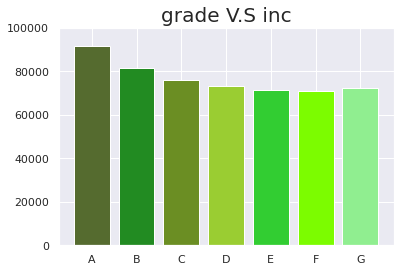

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np 
# def update_ticks(x,pos):
#     if x == 0:
#         return 'False'
#     if x==1:
#         return 'True'
sns.set(style = "darkgrid")
plt.title("grade V.S inc", fontdict = {'fontsize': 20})
plt.ylim(0, 100000)
plt.bar(grr, inc, width=0.8, bottom=None, align='center', color=['darkolivegreen','forestgreen','olivedrab','yellowgreen','limegreen','lawngreen','lightgreen'])


##Boxplot Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

In [ ]:
import pandas as pd
tmp=df.groupby("stays_in_week_nights")
tmp.size()
i = df.groupby("stays_in_week_nights").size().reset_index()
j = {k : dict(g.values) for k, g in i.groupby(level=0)}
new={}
for i in range (len(j)):  
  new.update({list(j[i].keys())[0]:list(j[i].values())[0]})
# new
weekdaytop5 = dict(sorted(new.items(), key=lambda item: item[1],reverse=True)[:5])
weekdaytop5

{1: 30310, 2: 33684, 3: 22258, 4: 9563, 5: 11077}

In [ ]:
import pandas as pd
tmp2=df.groupby("stays_in_weekend_nights")
tmp2.size()
i2 = df.groupby("stays_in_weekend_nights").size().reset_index()
j2 = {k : dict(g.values) for k, g in i2.groupby(level=0)}
new2={}
for i in range (len(j2)):  
  new2.update({list(j2[i].keys())[0]:list(j2[i].values())[0]})
# new2
weekendtop5 = dict(sorted(new2.items(), key=lambda item: item[1],reverse=True)[:5])
weekendtop5

{0: 51998, 1: 30626, 2: 33308, 3: 1259, 4: 1855}

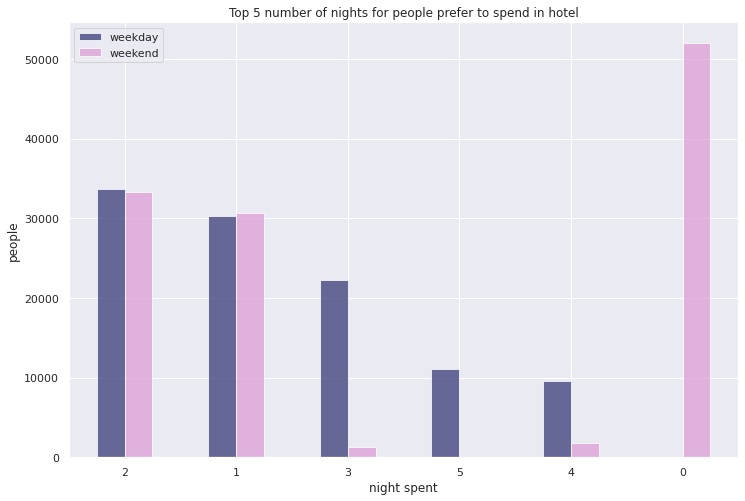

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

d = {
    'weekday': weekdaytop5,
    'weekend': weekendtop5,
}

ax=pd.DataFrame(d).plot(kind='bar',alpha=0.75, rot=0,figsize=(12,8),colormap="tab20b",title='Top 5 number of nights for people prefer to spend in hotel')
ax.set_xlabel("night spent")
ax.set_ylabel("people")
plt.show()

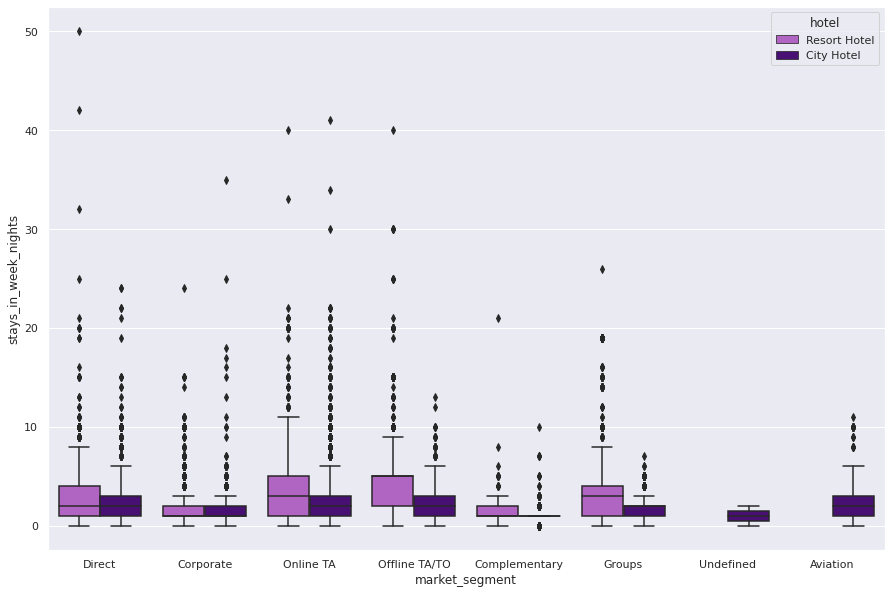

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = data, hue = "hotel", palette = ["mediumorchid","indigo"]);

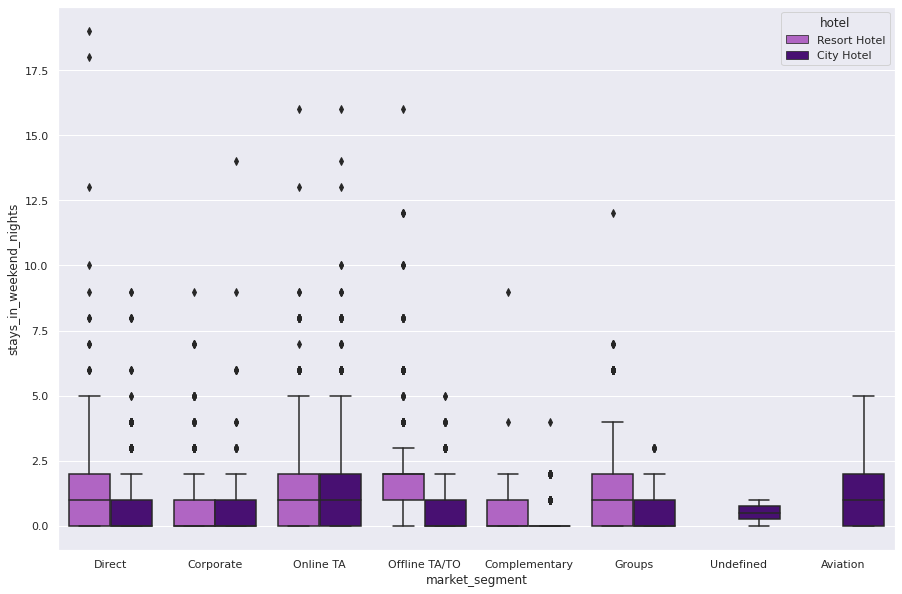

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = data, hue = "hotel", palette = ["mediumorchid","indigo"]);

##Countplot Distribution of Market Segments

No handles with labels found to put in legend.


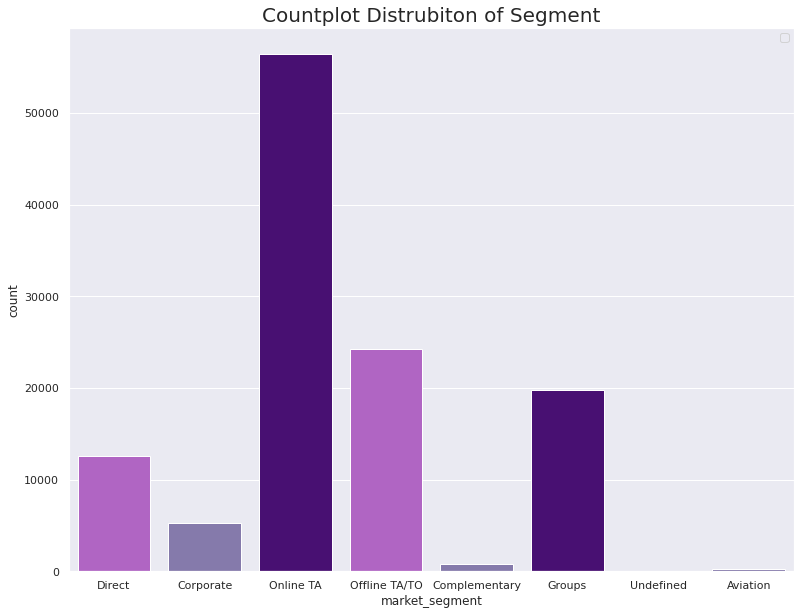

In [ ]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", data = data,palette=["mediumorchid","m","indigo"])
ax.legend(loc=1)

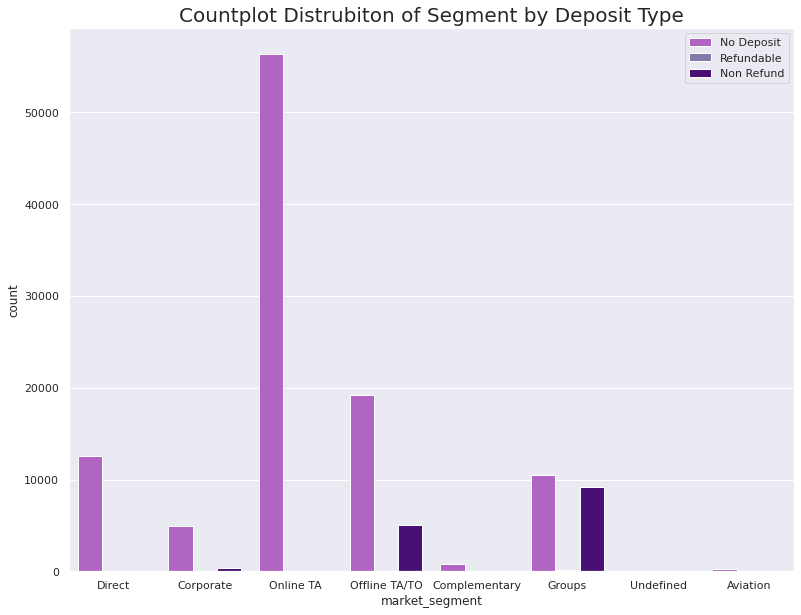

In [ ]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = data,palette=["mediumorchid","m","indigo"])
ax.legend(loc=1)

In [ ]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue 
= 'is_canceled', data = data,palette = ["mediumorchid","indigo"])
ax.legend(["not canceled", "canceled"], loc=1) 

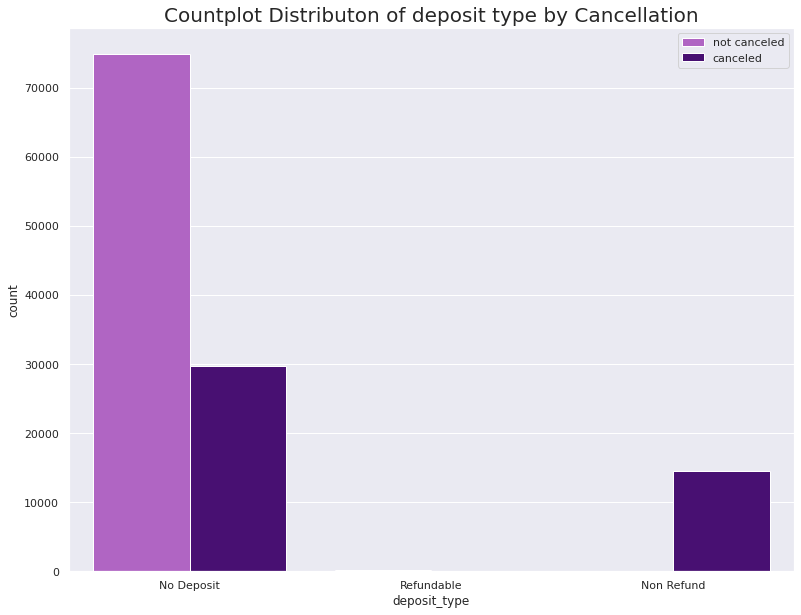

In [ ]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of deposit type by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "deposit_type", hue 
= 'is_canceled', data = data,palette = ["mediumorchid","indigo"])
ax.legend(["not canceled", "canceled"], loc=1) 

In [ ]:
repeated = df.groupby("is_canceled")
# repeated.size()
not_canceled=repeated.get_group(0)
counting=not_canceled.groupby("market_segment")
counting.size()

market_segment
Aviation           185
Complementary      646
Corporate         4303
Direct           10672
Groups            7714
Offline TA/TO    15908
Online TA        35738
dtype: int64

In [ ]:
NotCanceled = repeated.get_group(0)
NotCanceled_customer_segment = not_canceled.groupby("market_segment")
NotCanceled_customer_segment.size()

market_segment
Aviation           185
Complementary      646
Corporate         4303
Direct           10672
Groups            7714
Offline TA/TO    15908
Online TA        35738
dtype: int64

In [ ]:
data_NotCanceled_source = {"market_segment":['Aviation','Complementary','Corporate','Direct','Groups','Offline TA/TO','Online TA'],"count":[185,646,4303,10672,7714,15908,35735]}
df_NotCanceled_source = pd.DataFrame(data_NotCanceled_source)
df_NotCanceled_source

,market_segment,count
0,Aviation,185
1,Complementary,646
2,Corporate,4303
3,Direct,10672
4,Groups,7714
5,Offline TA/TO,15908
6,Online TA,35735


Text(0.5, 1.0, 'Market_segment : Not Canceled')

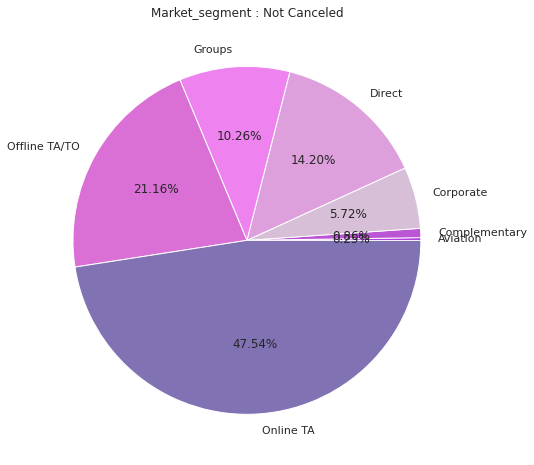

In [ ]:
plt.figure(figsize=(12,8))
pie_colors = ["darkviolet","mediumorchid","thistle","plum","violet","orchid","m"]
plt.pie(df_NotCanceled_source["count"], labels=df_NotCanceled_source["market_segment"], autopct="%2.2f%%", colors= pie_colors)
plt.title("Market_segment : Not Canceled")

In [ ]:
Canceled = repeated.get_group(1)
Canceled_customer_segment = Canceled.groupby("market_segment")
Canceled_customer_segment.size()

market_segment
Aviation            52
Complementary       97
Corporate          992
Direct            1934
Groups           12097
Offline TA/TO     8311
Online TA        20739
Undefined            2
dtype: int64

In [ ]:
data_Canceled_source = {"market_segment":['Aviation','Complementary','Corporate','Direct','Groups','Offline TA/TO','Online TA'],"count":[52,97,992,1934,12097,8311,20739]}
df_Canceled_source = pd.DataFrame(data_Canceled_source)
df_Canceled_source

,market_segment,count
0,Aviation,52
1,Complementary,97
2,Corporate,992
3,Direct,1934
4,Groups,12097
5,Offline TA/TO,8311
6,Online TA,20739


Text(0.5, 1.0, 'Market_segment : Canceled')

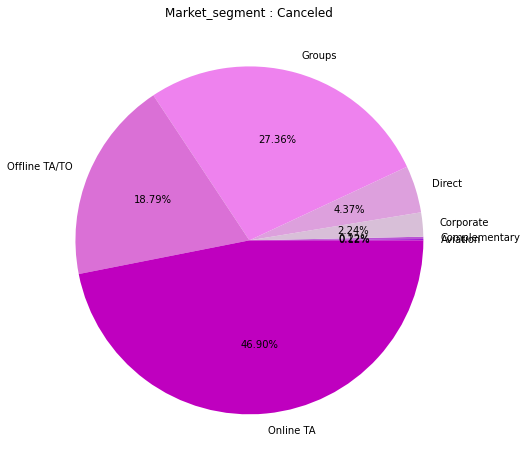

In [ ]:
plt.figure(figsize=(12,8))
pie_colors = ["darkviolet","mediumorchid","thistle","plum","violet","orchid","m"]
plt.pie(df_Canceled_source["count"], labels=df_Canceled_source["market_segment"], autopct="%2.2f%%", colors= pie_colors)
plt.title("Market_segment : Canceled")

##Density Curve of Lead Time by Cancelation

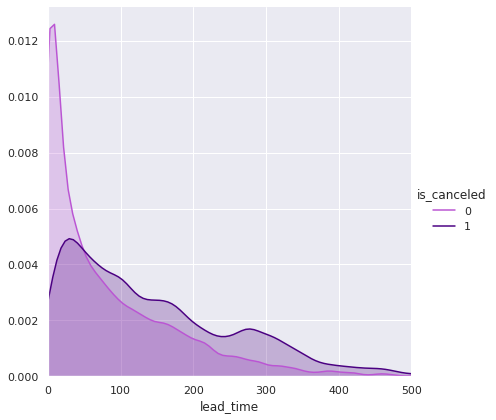

In [ ]:
(sns.FacetGrid(data, hue = 'is_canceled',
             height = 6,
             xlim = (0,500), palette=["mediumorchid","indigo"])
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

##Monthly Cancellations and Customers by Hotel Types

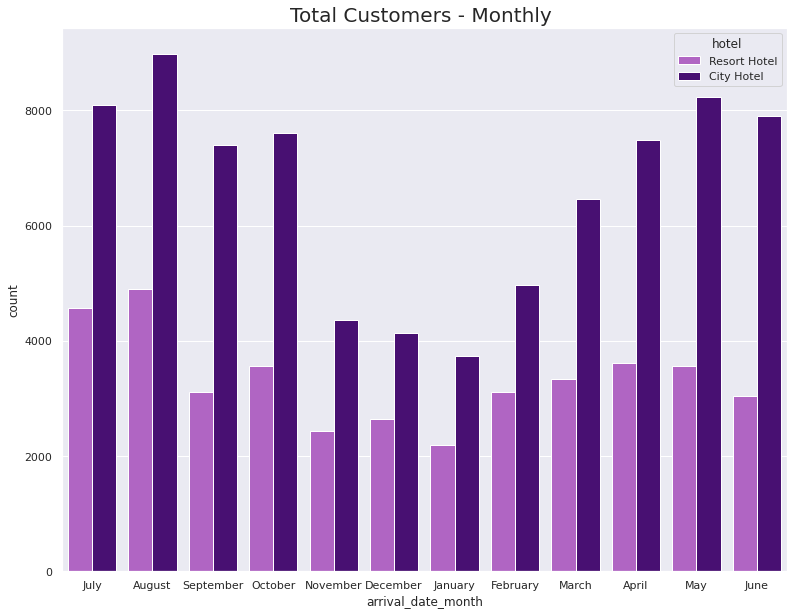

In [ ]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data, palette=["mediumorchid","indigo"])

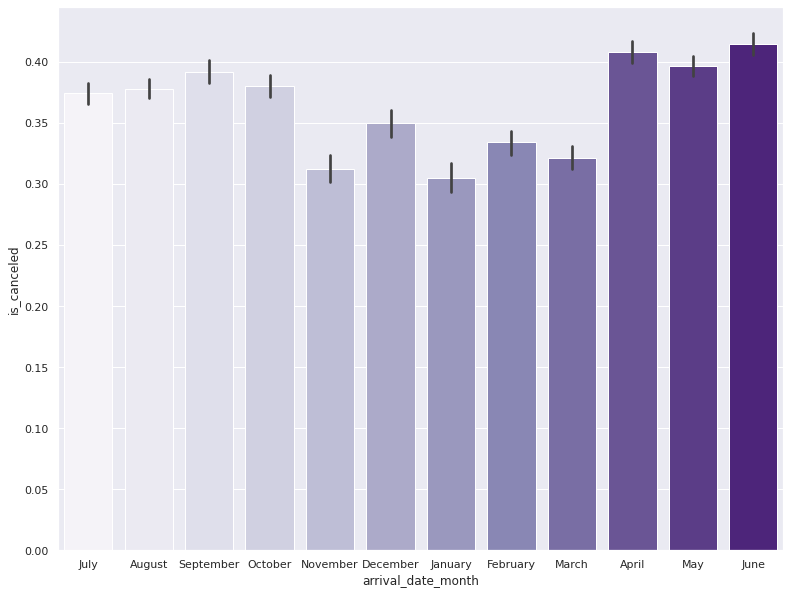

In [ ]:
plt.figure(figsize = (13,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = data, palette="Purples");

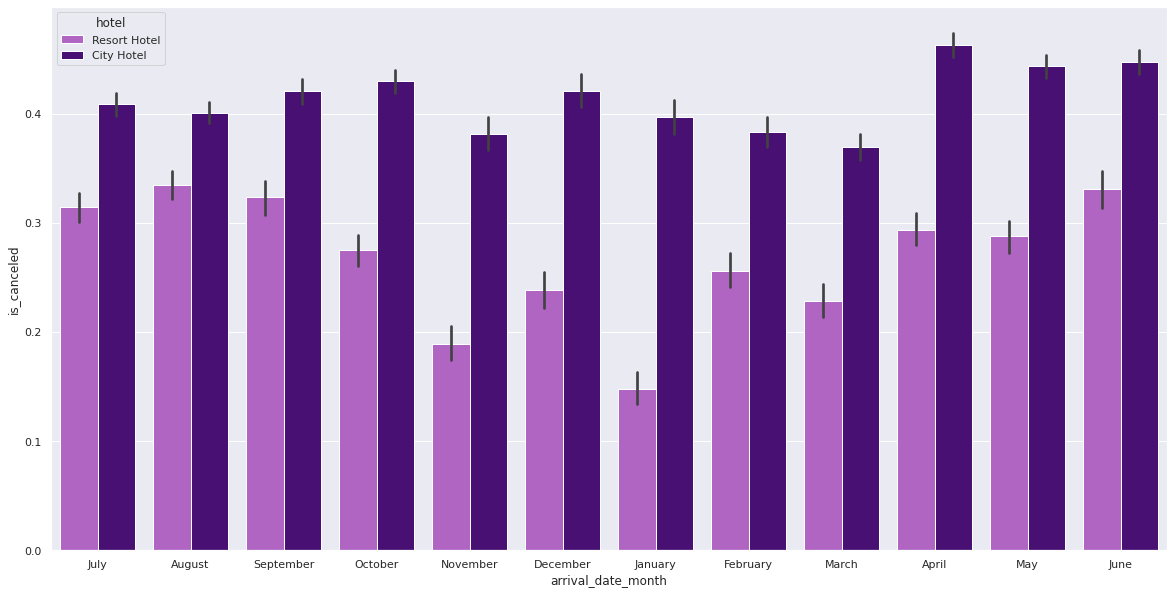

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = data, palette=["mediumorchid","indigo"]);

# Preprocessing

## Missing Values, Feature Engineering and Standardization

In [ ]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

In [ ]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format
(perc_mv(df, df['company']),perc_mv(df, df['agent']), perc_mv(df, df['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


In [ ]:
data["agent"].value_counts().count()#value_counts() 方法可以統計相異值的個數。

333

In [ ]:
# company is dropped
data = data.drop(['company'], axis = 1)

In [ ]:
# We have also 4 missing values in children column. If there is no information about children, In my opinion those customers do not have any children.
data['children'] = data['children'].fillna(0)

## Handling Features

In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 
'April':4, 'May':5, 'June':6, 'July':7,'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [ ]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [ ]:
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data

data = feature(data)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,deposit_given,total_nights
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0,0
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0,0
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1.0,0,1
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,1.0,0,1
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,2.0,0,2


In [ ]:
data = data.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

## Correlation

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [ ]:
cor_data = data.copy()

In [ ]:
le = LabelEncoder()

In [ ]:
# This data will not be used while predicting cancellation. This is just for checking correlation.
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])

In [ ]:
cor_data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,0.008018,0.083795,0.174419,-0.050421,-0.012292,-0.004441,-0.249677,-0.307834,-0.072820,-0.158500,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.124331,-0.058306,-0.040821,0.172003,-0.247479
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.017678,0.059338,0.167600,-0.084793,0.110133,-0.057358,-0.061282,-0.176028,-0.144381,-0.127883,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,-0.013010,0.046522,0.481457,0.017779
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.000349,0.013797,0.220414,-0.124410,0.086042,-0.073548,-0.106089,-0.172219,0.000149,-0.171430,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,-0.043972,0.072265,0.380179,0.157167
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.065840,0.107697,0.022644,0.010341,-0.119822,0.029218,0.092809,0.036141,0.030872,-0.017723,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.052711,0.052127,-0.065963,0.031438
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.015205,0.001293,0.007381,-0.030729,0.037479,-0.021640,-0.007923,-0.006378,0.004809,-0.000799,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.010427,0.027252,0.008746,0.021536
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.017381,-0.000510,0.005699,-0.030131,0.035501,-0.020904,-0.007997,-0.005684,0.005508,0.001638,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.010611,0.025220,0.007773,0.018719
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.007086,-0.004088,0.001578,-0.006145,-0.027011,-0.000300,0.016929,0.011646,0.010613,-0.002271,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,0.014710,0.006742,-0.008616,-0.027408
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.045744,0.115350,0.093097,-0.087239,-0.012775,-0.042715,0.142083,0.086643,0.063281,-0.110284,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558,0.052306,0.101426,-0.114275,0.762790
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.036742,0.108569,0.087185,-0.097245,-0.013992,-0.048743,0.168616,0.100795,0.096209,-0.110354,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607,0.050424,0.101665,-0.079999,0.941005
meal,0.008018,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,0.045744,0.036742,1.000000,0.145132,0.116957,-0.057009,-0.003772,-0.040417,-0.120749,-0.120792,0.024650,-0.095428,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,-0.041727,-0.005975,-0.090725,0.045277


In [ ]:
cor_data.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
agent                            -0.127883
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
meal                             -0.017678
is_family                        -0.013010
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
total_nights                      0.017779
stays_in_week_nights              0.024765
total_customer                    0.046522
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
previous_ca

In [ ]:
# It is highly correlated to total_nights and also there is no much difference impact, so I will not use total_nights.
# Week nights have higher impact.
# """
# Actually, I tried some models by using different features as (only total_nights | weekend_nights and week_nights | only week_nights ...) 
# and the models using only week nights seems to have a bit higher accuracy score. 
# """

cor_data.corr()['arrival_date_week_number'].sort_values()

arrival_date_year                -0.540561
is_repeated_guest                -0.030131
customer_type                    -0.028432
previous_bookings_not_canceled   -0.020904
reservation_status               -0.017387
meal                             -0.017381
reserved_room_type               -0.007997
assigned_room_type               -0.005684
market_segment                   -0.000510
hotel                             0.001270
agent                             0.001638
required_car_parking_spaces       0.001920
booking_changes                   0.005508
distribution_channel              0.005699
deposit_given                     0.007773
is_canceled                       0.008148
is_family                         0.010611
stays_in_week_nights              0.015558
stays_in_weekend_nights           0.018208
total_nights                      0.018719
days_in_waiting_list              0.022933
total_customer                    0.025220
total_of_special_requests         0.026149
previous_ca

In [ ]:
cor_data = cor_data.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights','arrival_date_month','arrival_date_year','reserved_room_type', 'arrival_date_day_of_month', 'agent'], axis = 1)

##Since we have decided what to do with features and missing values, we can work on first data.

In [ ]:
#Lets delete the NA rows of country column
indices = cor_data.loc[pd.isna(cor_data["country"]), :].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()

#There is no missing value in the data

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_family                         0
total_customer                    0
deposit_given                     0
dtype: int64

In [ ]:
#Lets delete the NA rows of country column
indices = cor_data.loc[pd.isna(cor_data["country"]), :].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()

#There is no missing value in the data

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_family                         0
total_customer                    0
deposit_given                     0
dtype: int64

In [ ]:
indices = data.loc[pd.isna(data["country"]), :].index 
data = data.drop(data.index[indices])   
data = data.drop(columns = ['arrival_date_week_number','stays_in_weekend_nights','arrival_date_year', 'arrival_date_day_of_month', 'agent'], axis = 1)

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'is_family',
       'total_customer', 'deposit_given', 'total_nights'],
      dtype='object')

In [ ]:
data.to_csv(mydrive+'preprocessing_data_01.csv',index=False,sep=',')

In [ ]:
# I keep data in case of any changes on features, missing values etc.
df1 = data.copy()

In [ ]:
#one-hot-encoding
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

In [ ]:
df1['country'] = le.fit_transform(df1['country']) 
# There are more than 300 classes, so I wanted to use label encoder on this feature.

##Decision Tree Model (reservation_status included)¶


In [ ]:
y = df1["is_canceled"]
X = df1.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
cart = DecisionTreeClassifier(max_depth = 12)

In [ ]:
cart_model = cart.fit(X_train, y_train)

In [ ]:
y_pred = cart_model.predict(X_test)

In [ ]:
print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Decision Tree Model
Accuracy Score: 1.0

Confusion Matrix:
 [[22353     0]
 [    0 13318]]

AUC Score: 1.0


Text(0.5, 0, 'Feature Importances (%)')

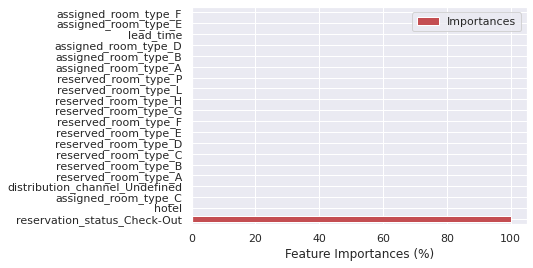

In [ ]:
pd.DataFrame(data = cart_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

##Final Arrangements Before Comparing the Models¶


In [ ]:
df2 = df1.drop(columns = ['reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis = 1)

In [ ]:
df2.to_csv(mydrive+'preprocessing_data_02.csv',index=False,sep=',')

In [ ]:
y = df2["is_canceled"]
X = df2.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
cart2 = DecisionTreeClassifier(max_depth = 12)

In [ ]:
cart2_model = cart2.fit(X_train, y_train)

In [ ]:
y2_pred = cart2_model.predict(X_test)

In [ ]:
print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y2_pred), confusion_matrix(y_test,y2_pred), roc_auc_score(y_test,y2_pred)))

Decision Tree Model
Accuracy Score: 0.8393933447338174

Confusion Matrix:
 [[20298  2055]
 [ 3674  9644]]

AUC Score: 0.816099392035373


In [ ]:
# We can use the functions to apply the models and roc curves to save space.
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

#Model and ROC Curve Comparison

##Logistic Regression Model


In [ ]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.8056965041630456

Confusion Matrix:
 [[20468  1885]
 [ 5046  8272]]


In [ ]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7580531307187804


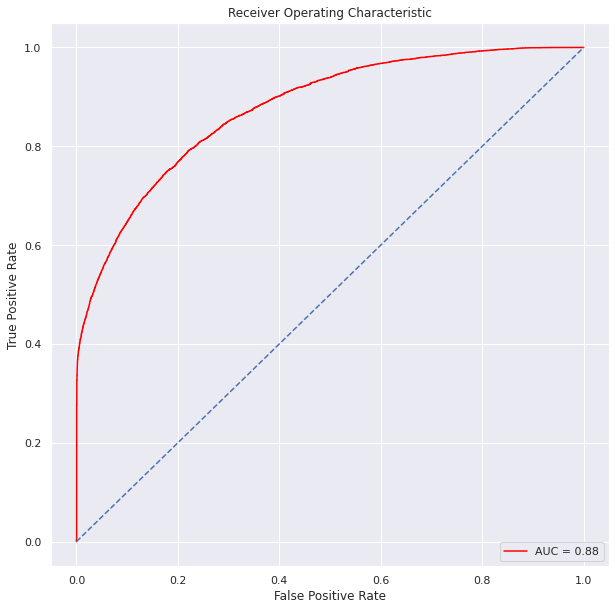

In [ ]:
ROC(y_test, y_prob)

##Gaussian Naive Bayes Model

In [ ]:
print('Model: Gaussian Naive Bayes\n')
model(GaussianNB(), X_train, X_test, y_train, y_test)

Model: Gaussian Naive Bayes

Accuracy Score: 0.5861624288637829

Confusion Matrix:
 [[ 9600 12753]
 [ 2009 11309]]


In [ ]:
NB = GaussianNB()
cv_scores = cross_val_score(NB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.5642026414707882


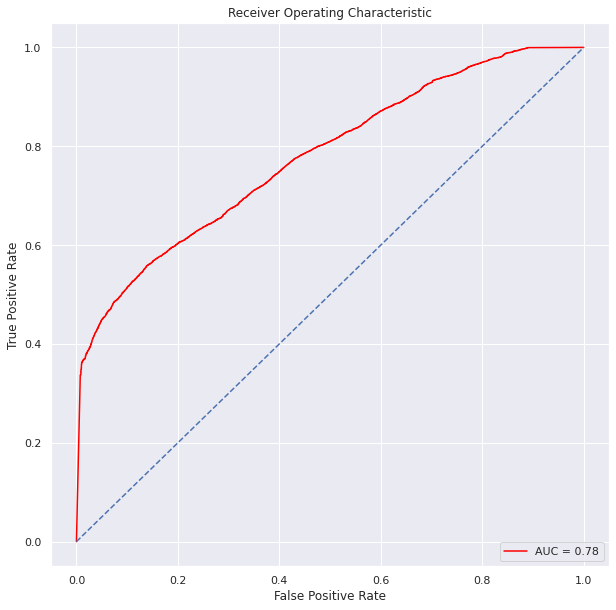

In [ ]:
ROC(y_test, y_prob)

##Decision Tree Model (reservation_status excluded)

In [ ]:
print('Model: Decision Tree\n')
model(DecisionTreeClassifier(max_depth = 12), X_train, X_test, y_train, y_test)

Model: Decision Tree

Accuracy Score: 0.839028903030473

Confusion Matrix:
 [[20289  2064]
 [ 3678  9640]]


In [ ]:
DTC = DecisionTreeClassifier(max_depth = 12)
cv_scores = cross_val_score(DTC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7200542253755067


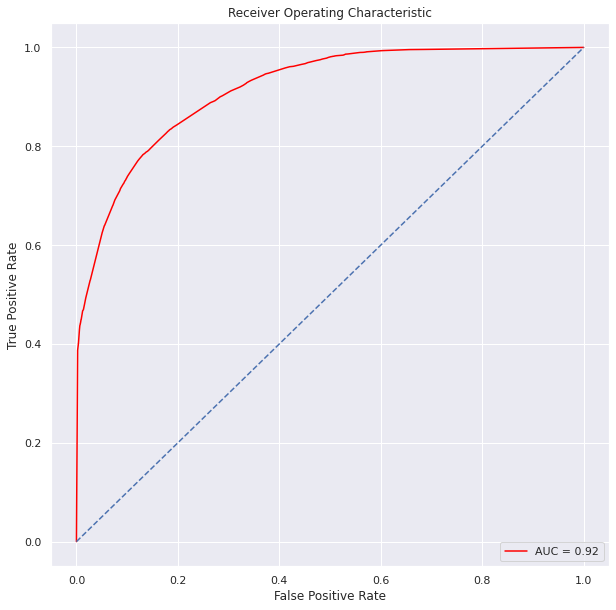

In [ ]:
ROC(y_test, y_prob)

##Random Forest

In [ ]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8815284124358723

Confusion Matrix:
 [[20885  1468]
 [ 2758 10560]]


In [ ]:
RFC = RandomForestClassifier()
cv_scores = cross_val_score(RFC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.694562677297218


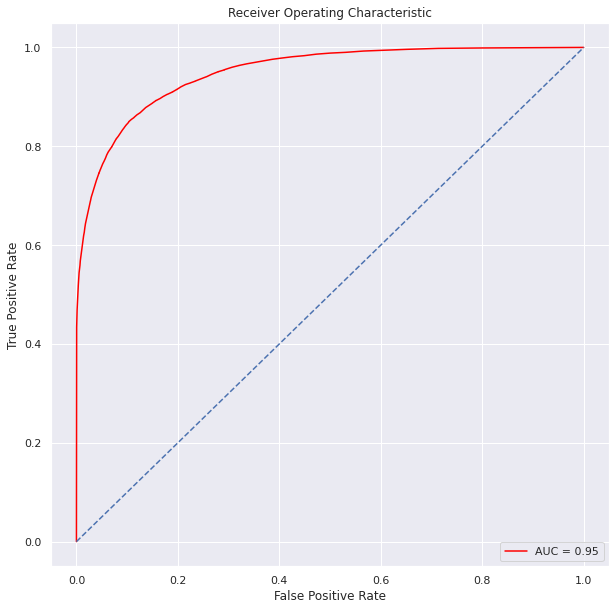

In [ ]:
ROC(y_test, y_prob)

##Random Forest Model Tuning

In [ ]:
rf_parameters = {"max_depth": [10,13],
                 "n_estimators": [10,100,500],
                 "min_samples_split": [2,5]}

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 19.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

Best parameters: {'max_depth': 13, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 13,
                                  min_samples_split = 2,
                                  n_estimators = 500)

print('Model: Random Forest Tuned\n')
model(rf_tuned, X_train, X_test, y_train, y_test)

Model: Random Forest Tuned

Accuracy Score: 0.849513610495921

Confusion Matrix:
 [[21099  1254]
 [ 4114  9204]]


##XGBoost Model

In [ ]:
print('Model: XGBoost\n')
model(XGBClassifier(), X_train, X_test, y_train, y_test)

Model: XGBoost

Accuracy Score: 0.839365310756637

Confusion Matrix:
 [[20488  1865]
 [ 3865  9453]]


In [ ]:
XGB = XGBClassifier()
cv_scores = cross_val_score(XGB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7621570324126552


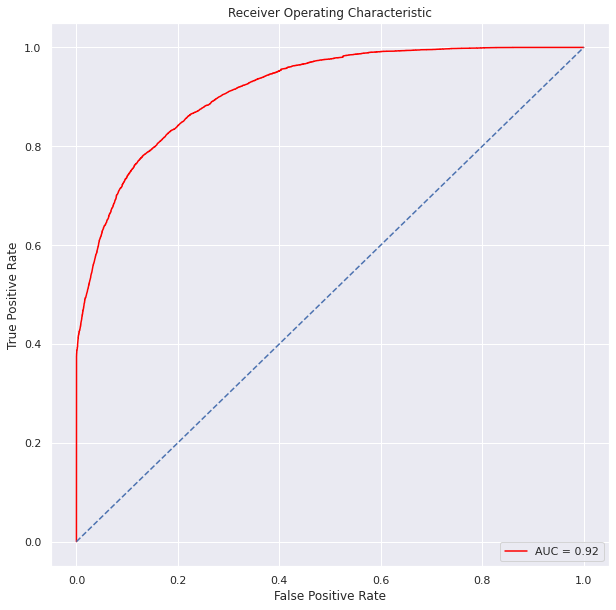

In [ ]:
ROC(y_test, y_prob)

##Neural Network Model

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('Model: Neural Network\n')
model(MLPClassifier(), X_train_scaled, X_test_scaled, y_train, y_test)

Model: Neural Network

Accuracy Score: 0.8496257464046424

Confusion Matrix:
 [[20047  2306]
 [ 3058 10260]]


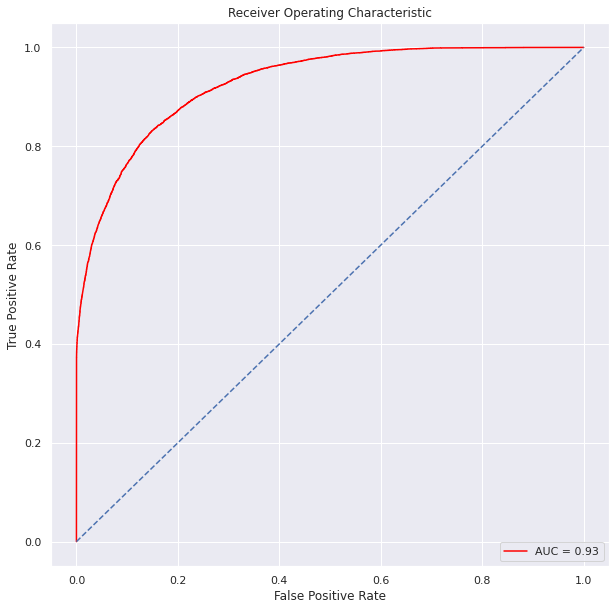

In [ ]:
ROC(y_test, y_prob)

##Neural Network Model Tuning

In [ ]:
mlpc_parameters = {"alpha": [1, 0.1, 0.01, 0.001],
                   "hidden_layer_sizes": [(50,50,50),
                                          (100,100)],
                   "solver": ["adam", "sgd"],
                   "activation": ["logistic", "relu"]}

In [ ]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_parameters,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 227.2min


In [ ]:
print('Best parameters: ' + str(mlpc_cv_model.best_params_))

In [ ]:
mlpc_tuned = MLPClassifier(activation = 'relu',
                           alpha = 0.1,
                           hidden_layer_sizes = (100,100),
                           solver = 'adam')

In [ ]:
print('Model: Neural Network Tuned\n')
model(mlpc_tuned, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
ROC(y_test, y_prob)

##Support Vector Classification Model

In [ ]:
#I excluded probability in the function for SVC, also I could not use other 
# kernel methods because it takes really long and I don't think SVC as a good model for this dateset. 
print('Model: SVC\n')

def model1(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_pred
    y_pred = alg_model.predict(X_test)
    
    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    
model1(SVC(kernel = 'linear'), X_train, X_test, y_train, y_test)

#Conclusion

##Feature Importances

In [ ]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

##Summary Table of the Models

In [ ]:
# key in manually
# remember to change the value
table = pd.DataFrame({"Model": ["Decision Tree (reservation status included)", "Logistic Regression",
                                "Naive Bayes", "Decision Tree", "Random Forest",
                                "Random Forest Tuned", "XGBoost", "Neural Network", "Neural Network Tuned",, "Support Vector"],
                     "Accuracy Scores": ["1", "0.804", "0.582", "0.794", "0.846",
                                         "0.883", "0.851", "0.869", "0.848", "0.859"],
                     "ROC | Auc": ["1", "0.88", "0.78", "0",
                                   "0.92", "0.95", "0", "0.94",
                                   "0.93", "0.94"]})


table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")
table["ROC | Auc"] = table["ROC | Auc"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)


SyntaxError: ignored